### Under Sampling Method

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\pre_processed_df.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud = df[df['Class']==1]

In [5]:
genuine = df[df['Class']==0].sample(len(fraud))

In [6]:
df_balanced = pd.concat([fraud,genuine])
df_balanced = df_balanced.sample(frac=1, random_state=42)

In [7]:
features = df_balanced.drop('Class',axis=1)
target = df_balanced['Class']

In [8]:
target.value_counts()

1    473
0    473
Name: Class, dtype: int64

In [9]:
scaler = StandardScaler()
features[['Time','Amount']] = scaler.fit_transform(features[['Time','Amount']])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=1234)

### Model Traning + Hyperparameter Tunning

#### Logistic Regression Model

In [35]:
#the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[1000,2000,5000]
}

In [36]:
# Create a GridSearchCV object
gscv = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [37]:
# Fit the GridSearchCV object to the training data
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [1000, 2000, 5000],
                         'solver': ['liblinear', 'lbfgs']})

In [38]:
best_params = gscv.best_params_

In [39]:
lgt = LogisticRegression(**best_params)
lgt.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [40]:
y_pred = lgt.predict(X_test)

In [41]:
accuracy_lgt = accuracy_score(y_test, y_pred)
precision_lgt = precision_score(y_test, y_pred)
recall_lgt = recall_score(y_test, y_pred)
f1_score_lgt = f1_score(y_test, y_pred)
mcc_lgt = matthews_corrcoef(y_test, y_pred)

print("Accuracy:", accuracy_lgt)
print("Precision:", precision_lgt)
print("Recall:", recall_lgt)
print("F1-score:", f1_score_lgt)
print("MCC:", mcc_lgt)

Accuracy: 0.9330985915492958
Precision: 0.9846153846153847
Recall: 0.8827586206896552
F1-score: 0.9309090909090909
MCC: 0.8712930336623459


In [42]:
cm_logit = confusion_matrix(y_test, y_pred)
print(cm_logit)

[[137   2]
 [ 17 128]]


#### SVM Model

In [44]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              } 

In [45]:
# Create a GridSearchCV object
gscv_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

In [46]:
gscv_svm.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [51]:
best_params_svm = gscv_svm.best_params_

In [52]:
svm = SVC(**best_params_svm)

svm.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [53]:
y_pred_svm = svm.predict(X_test)

In [54]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("MCC:", mcc_svm)

Accuracy: 0.9225352112676056
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1-score: 0.9202898550724637
MCC: 0.8494485431545925


In [55]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[135   4]
 [ 18 127]]


#### Decision Tree

In [56]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [57]:
# Create a GridSearchCV object
gscv_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

In [58]:
gscv_dt.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50]})

In [59]:
best_params_dt = gscv_dt.best_params_

In [60]:
dtree = DecisionTreeClassifier(**best_params_dt)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10)

In [61]:
y_pred_dtree = dtree.predict(X_test)

In [62]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_score_dtree = f1_score(y_test, y_pred_dtree)
mcc_dtree = matthews_corrcoef(y_test, y_pred_dtree)

print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-score:", f1_score_dtree)
print("MCC:", mcc_dtree)

Accuracy: 0.9330985915492958
Precision: 1.0
Recall: 0.8689655172413793
F1-score: 0.9298892988929889
MCC: 0.8743395586968635


In [63]:
cm_dt = confusion_matrix(y_test, y_pred_dtree)
print(cm_dt)

[[139   0]
 [ 19 126]]


### CNN

In [12]:
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [13]:
X_train1 = X_train.to_numpy()
y_train1 = y_train.to_numpy()
X_val1 = X_val.to_numpy()
y_val1 = y_val.to_numpy()
X_test1 = X_test1.to_numpy()
y_test1 = y_test1.to_numpy()

In [14]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1],1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)
X_train1.shape, X_test1.shape

((662, 30, 1), (142, 30, 1))

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import keras_tuner
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

C:\Users\Ravin\AppData\Local\Temp\ipykernel_3052\598770444.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [16]:
#import model
model=Sequential()

In [50]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='relu')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model


In [57]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output',project_name="Hyperparameter Tuning of CNN")

In [58]:
tuner.search(X_train1, y_train1, epochs=5, validation_data=(X_val1, y_val1))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.9154929518699646

Best val_accuracy So Far: 0.9154929518699646
Total elapsed time: 00h 00m 09s


In [61]:
best_model=tuner.get_best_models(num_models=1)[0]
best_model(X_train1)

<tf.Tensor: shape=(662, 1), dtype=float32, numpy=
array([[4.97735500e+00],
       [5.73536015e+00],
       [4.20321178e+00],
       [2.28749418e+00],
       [2.16849327e-01],
       [4.03928787e-01],
       [3.22039127e-02],
       [2.17942465e-02],
       [5.51707268e+00],
       [9.26881981e+00],
       [1.44942701e-01],
       [4.73464870e+00],
       [8.90975094e+00],
       [1.97789848e-01],
       [2.27360390e-02],
       [4.61292207e-01],
       [2.03781664e-01],
       [7.07489997e-02],
       [1.69355726e+00],
       [6.25173378e+00],
       [3.34079480e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.72636771e+00],
       [3.13647836e-02],
       [0.00000000e+00],
       [3.04910612e+00],
       [3.10361266e+00],
       [4.95290375e+00],
       [2.00737298e-01],
       [1.53310716e-01],
       [0.00000000e+00],
       [4.41119783e-02],
       [3.51418972e-01],
       [2.66679615e-01],
       [8.32262611e+00],
       [1.19100466e-01],
       [1.98943913e+00],


In [62]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (662, 26, 32)             192       
                                                                 
 batch_normalization (BatchN  (662, 26, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (662, 26, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (662, 22, 48)             7728      
                                                                 
 batch_normalization_1 (Batc  (662, 22, 48)            192       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (662, 22, 48)             0

In [80]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output/best_model_us_data.h5', save_best_only=True)

In [81]:
# fitting the model
cnn_fit =best_model.fit(X_train1,y_train1,epochs=100,validation_data=(X_val1,y_val1),callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 0.7140 - accuracy: 0.9350 - val_loss: 1.3269 - val_accuracy: 0.9014
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8896 - accuracy: 0.9411 - val_loss: 1.5286 - val_accuracy: 0.9014
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7203 - accuracy: 0.9441 - val_loss: 1.2242 - val_accuracy: 0.9014
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.9441 - val_loss: 1.2557 - val_accuracy: 0.8944
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5852 - accuracy: 0.9607 - val_loss: 1.5272 - val_accuracy: 0.9014
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7959 - accuracy: 0.9456 - val_loss: 1.5392 - val_accuracy: 0.8873
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.9532 - val_loss: 1.5240 - val_accuracy: 0.9014
Epoch 8/100
2

In [82]:
# plot
def plot_learningcurve(cnn_fit,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, cnn_fit.history['accuracy'])
  plt.plot(epoch, cnn_fit.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, cnn_fit.history['loss'])
  plt.plot(epoch, cnn_fit.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

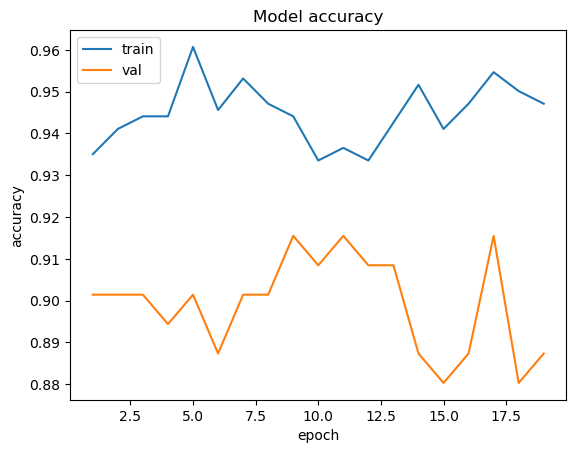

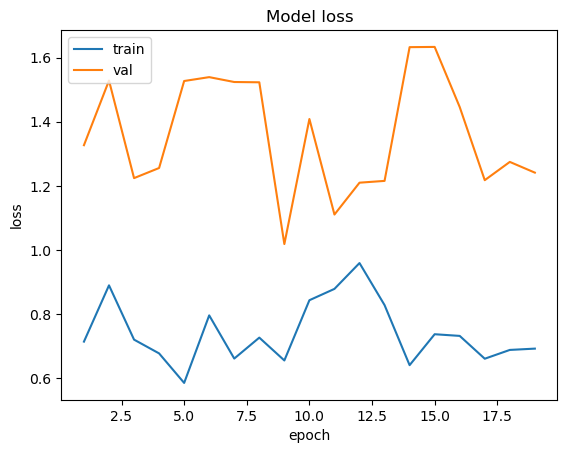

In [83]:
plot_learningcurve(cnn_fit,19)

In [84]:
y_pred_cnn = best_model.predict(X_test1)

5/5 [==============================] - 0s 2ms/step


In [85]:
import numpy as np

def predict_classes(probs, threshold=0.5):

  classes = np.zeros_like(probs, dtype=int)
  classes[probs >= threshold] = 1
  return classes


In [86]:
preds = predict_classes(y_pred_cnn)

In [87]:
accuracy_cnn = accuracy_score(y_test1, preds)
precision_cnn = precision_score(y_test1, preds)
recall_cnn = recall_score(y_test1, preds)
f1_score_cnn = f1_score(y_test1, preds)
mcc_cnn = matthews_corrcoef(y_test1, preds)

print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("F1-score:", f1_score_cnn)
print("Recall:", recall_cnn)
print("MCC:", mcc_cnn)

Accuracy: 0.8943661971830986
Precision: 0.9836065573770492
F1-score: 0.888888888888889
Recall: 0.8108108108108109
MCC: 0.8034025424996645


In [88]:
cm_dt = confusion_matrix(y_test1, preds)
print(cm_dt)

[[67  1]
 [14 60]]
